In [15]:
import ROOT as r
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
import sys
import math
import glob

In [2]:
def mass_to_float(s):
    """
    Converts a string of the form 'mXpY' into a float.
    
    Args:
        s (str): The input string in the format 'mXpY', where X and Y are digits.
    
    Returns:
        float: The corresponding float value.
    """
    if not s.startswith("m") or "p" not in s:
        raise ValueError("Input string must be in the format 'mXpY'.")

    # Extract parts
    integer_part = s[1:s.index("p")]  # Part after 'm' and before 'p'
    fractional_part = s[s.index("p") + 1:]  # Part after 'p'

    # Combine and convert to float
    return float(f"{integer_part}.{fractional_part}")

def charge_to_float(s):
    """
    Converts a string of the form 'mXpY' into a float.
    
    Args:
        s (str): The input string in the format 'mXpY', where X and Y are digits.
    
    Returns:
        float: The corresponding float value.
    """
    if not s.startswith("c") or "p" not in s:
        raise ValueError("Input string must be in the format 'cXpY'.")

    # Extract parts
    integer_part = s[1:s.index("p")]  # Part after 'm' and before 'p'
    fractional_part = s[s.index("p") + 1:]  # Part after 'p'

    # Combine and convert to float?
    return float(f"{integer_part}.{fractional_part}")

In [3]:
def dataframe_to_simple_latex_table(df):
    """
    Converts a pandas DataFrame to a clean LaTeX tabular format without the overhead of longtable.
    
    Parameters:
        df (pd.DataFrame): DataFrame to convert.

    Returns:
        str: Clean LaTeX tabular table as a string.
    """
    # Apply formatting for numeric columns
    formatted_df = df.copy()
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            formatted_df[col] = formatted_df[col].apply(lambda x: f"{x:.2e}")

    # Generate LaTeX tabular table
    latex_table = formatted_df.to_latex(
        index=False,  # Exclude row indices
        escape=False,  # Allow LaTeX syntax
        column_format="|".join(["c"] * len(df.columns)),  # Simple column alignment
        header=True  # Include headers
    )

    # Remove any unnecessary additional LaTeX formatting
    latex_table = latex_table.replace("\\begin{longtable}", "\\begin{tabular}")
    latex_table = latex_table.replace("\\end{longtable}", "\\end{tabular}")
    latex_table = latex_table.replace("\\endfirsthead", "")
    latex_table = latex_table.replace("\\endhead", "")
    latex_table = latex_table.replace("\\endfoot", "")
    latex_table = latex_table.replace("\\endlastfoot", "")
    latex_table = latex_table.replace("\\toprule", "\\hline")
    latex_table = latex_table.replace("\\midrule", "\\hline")
    latex_table = latex_table.replace("\\bottomrule", "\\hline")
    latex_table = latex_table.replace("\\\\\n", "")

    return latex_table

In [6]:
#dataDir = '/abyss/users/mcarrigan/milliqan/backgroundCutFlow_signalSim_SR2/'
#dataDir = '/abyss/users/mcarrigan/milliqan/backgroundCutFlow_signalSim_SR2_noFrontBackReq/'
#dataDir = '/abyss/users/mcarrigan/milliqan/backgroundCutFlow_signalSim_SR2_allowPanel20_requireFrontBack/'
dataDir = '/abyss/users/mcarrigan/milliqan/backgroundCutFlow_signalSim_SR2'
#dataDir = '/abyss/users/mcarrigan/milliqan/backgroundCutFlow_signalSim_SR1_v2'

df = pd.DataFrame(columns=['mass', 'charge', 'total', 'hitDetector', 'passing'])

for filename in os.listdir(dataDir):
    if not filename.endswith('.root'): continue

    #for some reason os.listdir is appending this to the filenames...
    if filename.startswith('.sys.v#.'): filename = filename.replace('.sys.v#.', '')
        
    charge = filename.split('_')[-2].replace('.root', '')
    mass = filename.split('_')[-3]

    print(filename, mass, charge)

    inputFile = '/'.join([dataDir, filename])
    print(dataDir, filename, inputFile)
    fin = r.TFile.Open(inputFile, 'READ')

    cf = fin.Get('eventCutFlow')

    nbins = cf.GetNbinsX()
    total = cf.GetBinContent(1)
    hitDetector = cf.GetBinContent(2)
    passing = cf.GetBinContent(nbins)

    mass = mass_to_float(mass)
    charge = charge_to_float(charge)

    df.loc[len(df)] = [mass, charge, total, hitDetector, passing]

    #if passing == 0: continue
    #print(mass, charge, total, passing)

    fin.Close()

df['ratio'] = df['passing']/df['total']
df['hitDetectorRatio'] = df['hitDetector']/df['total']
df['passingRatio'] = df['passing']/df['hitDetector']

print(df['passing'].sum(), df['total'].sum(), df['hitDetector'].sum())
    

bgCutFlow_signalSim_m1p0_c0p0053_36.root m1p0 c0p0053
/abyss/users/mcarrigan/milliqan/backgroundCutFlow_signalSim_SR2 bgCutFlow_signalSim_m1p0_c0p0053_36.root /abyss/users/mcarrigan/milliqan/backgroundCutFlow_signalSim_SR2/bgCutFlow_signalSim_m1p0_c0p0053_36.root
bgCutFlow_signalSim_m1p0_c0p006_22.root m1p0 c0p006
/abyss/users/mcarrigan/milliqan/backgroundCutFlow_signalSim_SR2 bgCutFlow_signalSim_m1p0_c0p006_22.root /abyss/users/mcarrigan/milliqan/backgroundCutFlow_signalSim_SR2/bgCutFlow_signalSim_m1p0_c0p006_22.root
bgCutFlow_signalSim_m2p3_c0p09_88.root m2p3 c0p09
/abyss/users/mcarrigan/milliqan/backgroundCutFlow_signalSim_SR2 bgCutFlow_signalSim_m2p3_c0p09_88.root /abyss/users/mcarrigan/milliqan/backgroundCutFlow_signalSim_SR2/bgCutFlow_signalSim_m2p3_c0p09_88.root
bgCutFlow_signalSim_m4p5_c0p008_125.root m4p5 c0p008
/abyss/users/mcarrigan/milliqan/backgroundCutFlow_signalSim_SR2 bgCutFlow_signalSim_m4p5_c0p008_125.root /abyss/users/mcarrigan/milliqan/backgroundCutFlow_signalSim_SR

Error in <THashList::Delete>: A list is accessing an object (0xe592060) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0xe5b7470) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0xe5d8d00) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0xe5db850) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0xe5dd630) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0xe5dcd30) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0xe5d9e20) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0xe5e53d0) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0xe5daea0) already deleted (list name = THa

In [7]:
df[df['mass']==25]

,mass,charge,total,hitDetector,passing,ratio,hitDetectorRatio,passingRatio
22,25.0,0.030,2915.0,276.0,51.0,0.017496,0.094683,0.184783
49,25.0,0.040,2915.0,288.0,58.0,0.019897,0.098799,0.201389
202,25.0,0.100,2915.0,294.0,49.0,0.016810,0.100858,0.166667
204,25.0,0.070,2915.0,290.0,55.0,0.018868,0.099485,0.189655
205,25.0,0.080,2915.0,296.0,59.0,0.020240,0.101544,0.199324
206,25.0,0.093,2915.0,295.0,57.0,0.019554,0.101201,0.193220
208,25.0,0.060,2915.0,291.0,63.0,0.021612,0.099828,0.216495
211,25.0,0.200,2915.0,298.0,36.0,0.012350,0.102230,0.120805
215,25.0,0.090,2915.0,290.0,56.0,0.019211,0.099485,0.193103
218,25.0,0.050,2915.0,284.0,62.0,0.021269,0.097427,0.218310


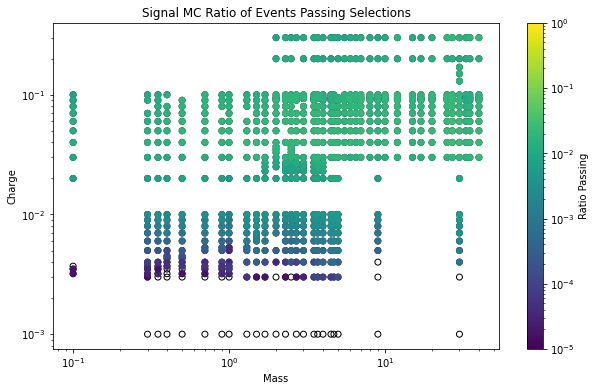

In [8]:
# Sample data (replace with your actual DataFrame)
weights = df['ratio'].to_numpy()

# Normalize weights for colormap
#norm = colors.Normalize(vmin=np.nanmin(weights), vmax=np.nanmax(weights))
norm = colors.LogNorm(vmin=1e-5, vmax=1)

plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(df['mass'], df['charge'], marker='o', facecolors='none', edgecolors='black')
plt.scatter(df['mass'], df['charge'], c=weights, cmap='viridis', norm=norm)

# Add a color bar
plt.colorbar(label='Ratio Passing')

# Add labels and title
plt.xlabel('Mass')
plt.ylabel('Charge')
plt.title('Signal MC Ratio of Events Passing Selections')

plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.show()


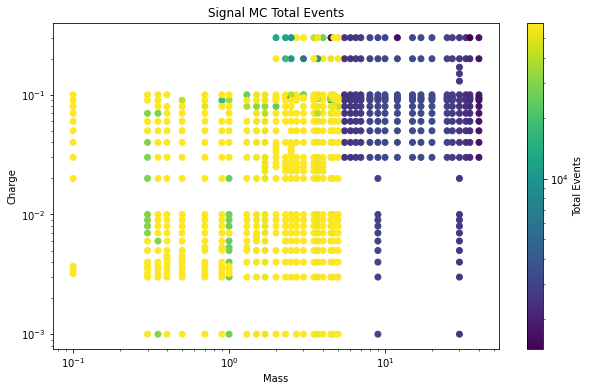

In [9]:
# Sample data (replace with your actual DataFrame)
weights = df['total'].to_numpy()

# Normalize weights for colormap
#norm = colors.Normalize(vmin=np.nanmin(weights), vmax=np.nanmax(weights))
log_norm = colors.LogNorm(vmin=np.nanmin(weights[weights > 0]), vmax=np.nanmax(weights))

plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(df['mass'], df['charge'], c=weights, cmap='viridis', norm=log_norm)

# Add a color bar
plt.colorbar(label='Total Events')

# Add labels and title
plt.xlabel('Mass')
plt.ylabel('Charge')
plt.title('Signal MC Total Events')

plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.show()


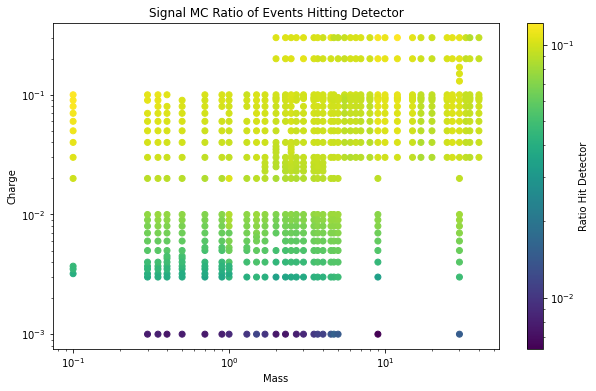

In [10]:
# Sample data (replace with your actual DataFrame)
weights = df['hitDetectorRatio'].to_numpy()

# Normalize weights for colormap
norm = colors.LogNorm(vmin=np.nanmin(weights), vmax=np.nanmax(weights))

plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(df['mass'], df['charge'], c=weights, cmap='viridis', norm=norm)

# Add a color bar
plt.colorbar(label='Ratio Hit Detector')

# Add labels and title
plt.xlabel('Mass')
plt.ylabel('Charge')
plt.title('Signal MC Ratio of Events Hitting Detector')

plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.show()


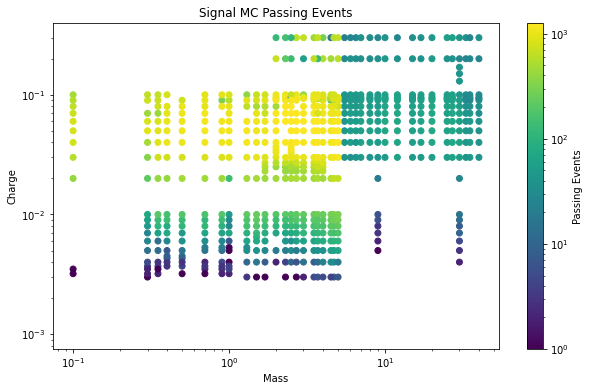

In [11]:
# Sample data (replace with your actual DataFrame)
weights = df['passing'].to_numpy()

# Normalize weights for colormap
#norm = colors.Normalize(vmin=np.nanmin(weights), vmax=np.nanmax(weights))
log_norm = colors.LogNorm(vmin=np.nanmin(weights[weights > 0]), vmax=np.nanmax(weights))

plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(df['mass'], df['charge'], c=weights, cmap='viridis', norm=log_norm)

# Add a color bar
plt.colorbar(label='Passing Events')

# Add labels and title
plt.xlabel('Mass')
plt.ylabel('Charge')
plt.title('Signal MC Passing Events')

plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.show()


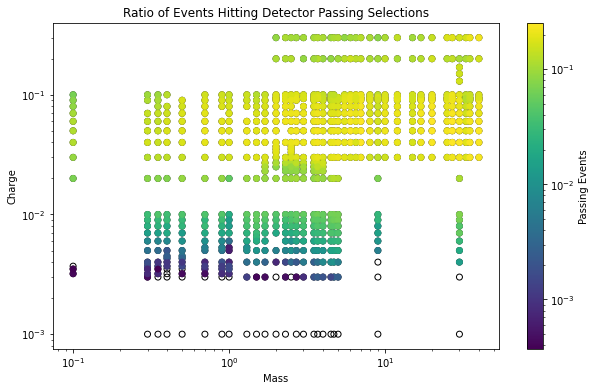

In [12]:
# Sample data (replace with your actual DataFrame)
weights = df['passingRatio'].to_numpy()
#norm = colors.Normalize(vmin=np.nanmin(weights), vmax=np.nanmax(weights))

# Normalize weights for colormap
#norm = colors.Normalize(vmin=np.nanmin(weights), vmax=np.nanmax(weights))
log_norm = colors.LogNorm(vmin=np.nanmin(weights[weights > 0]), vmax=np.nanmax(weights))

plt.figure(figsize=(10, 6))

# Create a scatter plot
plt.scatter(df['mass'], df['charge'], marker='o', facecolors='none', edgecolors='black')
plt.scatter(df['mass'], df['charge'], c=weights, cmap='viridis', norm=log_norm)

# Add a color bar
plt.colorbar(label='Passing Events')

# Add labels and title
plt.xlabel('Mass')
plt.ylabel('Charge')
plt.title('Ratio of Events Hitting Detector Passing Selections')

plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.show()


In [34]:
c1 = r.TCanvas("c1", "c1", 800, 600)

dataDir = '/abyss/users/mcarrigan/milliqan/backgroundCutFlow_signalSim_SR2/'

'''f_names = ['bgCutFlow_signalSim_m2p0_c0p03_*.root', 
            'bgCutFlow_signalSim_m10p0_c0p03_*.root', 
            'bgCutFlow_signalSim_m30p0_c0p2_*.root', 
            'bgCutFlow_signalSim_m25p0_c0p1_*.root']''' #good for SR2

f_names = ['bgCutFlow_signalSim_m0p4_c0p003_*.root', 
            'bgCutFlow_signalSim_m2p0_c0p003_*.root',
            'bgCutFlow_signalSim_m9p0_c0p004_*.root', 
            'bgCutFlow_signalSim_m30p0_c0p01_*.root'] #good for SR1

names = ['-'.join(x.split('_')[2:4]) for x in f_names]

colors = [r.kBlack, r.kBlue, r.kRed, r.kGreen, r.kMagenta, r.kCyan]

files = []
eventCutFlows = []
eventCutFlowsScaled = []
eventCutFlowEff = []
pulseCutFlows = []
panelHits = []
panelArea = []


for f in f_names:
    fname = glob.glob('/'.join([dataDir,f]))[0]

    fin = r.TFile.Open(fname, 'READ')
    h = fin.Get('eventCutFlow').Clone()
    hEff = fin.Get('eventCutEfficiencies').Clone()
    h2 = fin.Get('pulseCutFlow').Clone()

    hPanelArea = fin.Get('h_panelNPEBefore').Clone()
    hPanelHits = fin.Get('h_panelHitsBefore').Clone()

    hScaled = h.Clone()
    hScaled.Scale(1/hScaled.GetBinContent(1))

    eventCutFlowsScaled.append(hScaled)
    eventCutFlows.append(h)
    pulseCutFlows.append(h2)
    eventCutFlowEff.append(hEff)
    panelHits.append(hPanelHits)
    panelArea.append(hPanelArea)

    fin.Close()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Error in <TList::Clear>: A list is accessing an object (0x108f9c60) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x10aacd40) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x10b01700) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x10b16e20) already deleted (list name = TList)
Error in <THashList::Delete>: A list is accessing an object (0x10aa6e30) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x10ab1840) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x10af9220) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0x10b15a50) already deleted (list name = THashList)
Error in <THashList::Delete>: A list is accessing an object (0

Error in <TList::Clear>: A list is accessing an object (0x10b01700) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x10a7fd90) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x10b29e40) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x10b37e70) already deleted (list name = TList)


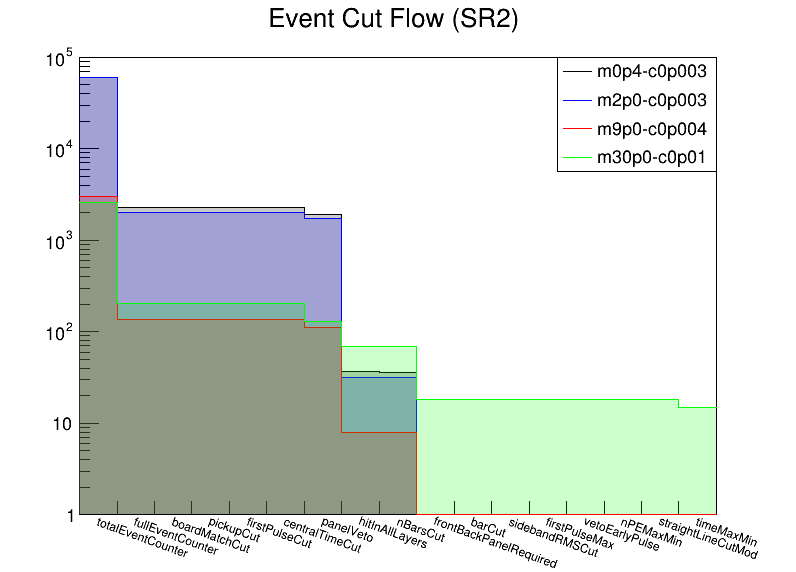

In [37]:
r.gStyle.SetOptStat(0)

l1 = r.TLegend(0.7, 0.7, 0.9, 0.9)

for i, h in enumerate(eventCutFlows):

    if i > 3: continue
    if i == 0:
        h.SetTitle("Event Cut Flow (SR2)")
        h.Draw("hist")
        h.SetFillColorAlpha(colors[0], 0.2)
        h.SetLineColor(colors[0])
        h.GetYaxis().SetRangeUser(1, 1e5)
    else:
        h.Draw("same hist")
        h.SetLineColor(colors[i])
        h.SetFillColorAlpha(colors[i], 0.2)

    l1.AddEntry(h, names[i], 'l')

l1.Draw()

c1.Draw()
c1.SetLogy()

Error in <TList::Clear>: A list is accessing an object (0x108f5a50) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x10b10cc0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x10b27f80) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x10b26400) already deleted (list name = TList)


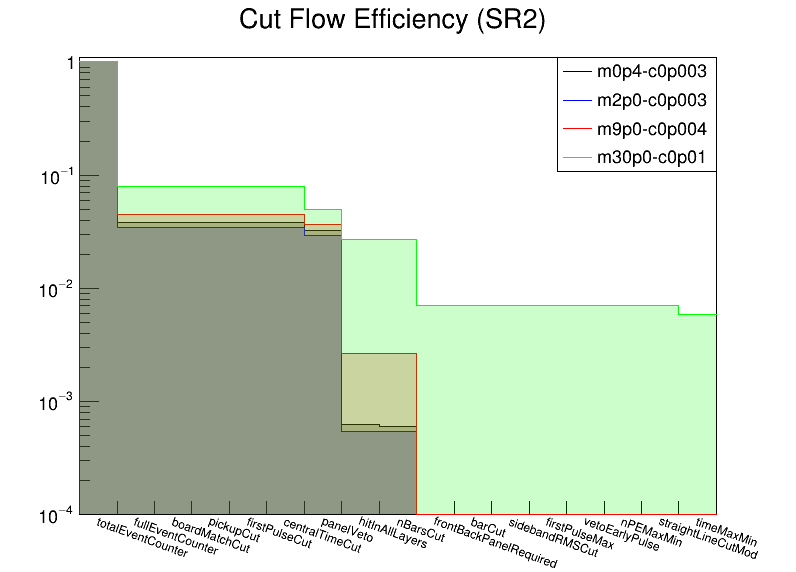

In [38]:
r.gStyle.SetOptStat(0)

l1 = r.TLegend(0.7, 0.7, 0.9, 0.9)

for i, h in enumerate(eventCutFlowEff):

    if i > 3: continue
    if i == 0:
        h.SetTitle("Cut Flow Efficiency (SR2)")
        h.Draw("hist")
        h.SetFillColorAlpha(colors[0], 0.2)
        h.SetLineColor(colors[0])
        h.GetYaxis().SetRangeUser(1e-4, 1.1)
    else:
        h.Draw("same hist")
        h.SetLineColor(colors[i])
        h.SetFillColorAlpha(colors[i], 0.2)

    l1.AddEntry(h, names[i], 'l')

l1.Draw()

c1.Draw()
c1.SetLogy()

Error in <TList::Clear>: A list is accessing an object (0xfd0f450) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x102dcc30) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x1041dcd0) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x102f9840) already deleted (list name = TList)


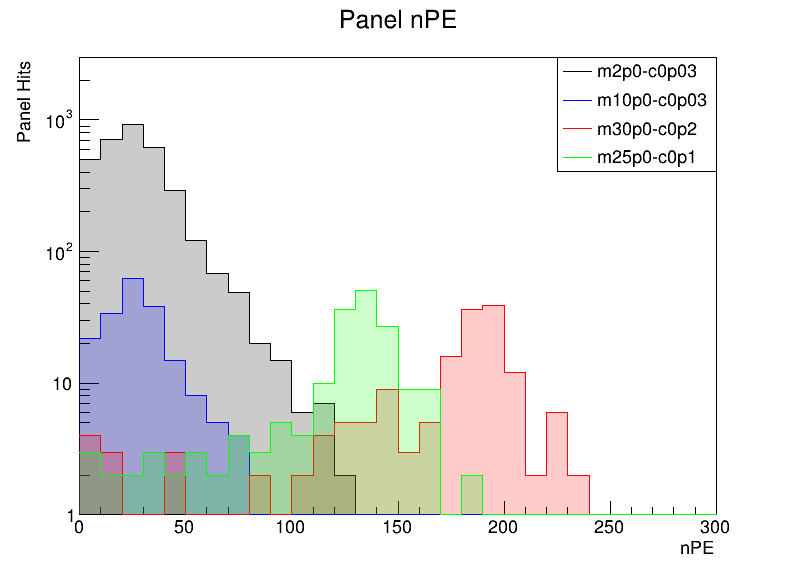

In [20]:
r.gStyle.SetOptStat(0)

l1 = r.TLegend(0.7, 0.7, 0.9, 0.9)

for i, h in enumerate(panelArea):

    if i > 3: continue
    if i == 0:
        h.SetTitle("Panel nPE")
        h.Draw("hist")
        h.SetFillColorAlpha(colors[0], 0.2)
        h.SetLineColor(colors[0])
        h.GetYaxis().SetRangeUser(1, 3e3)
        h.GetXaxis().SetRangeUser(0, 300)
    else:
        h.Draw("same hist")
        h.SetLineColor(colors[i])
        h.SetFillColorAlpha(colors[i], 0.2)

    l1.AddEntry(h, names[i], 'l')

l1.Draw()

c1.Draw()
c1.SetLogy()

Error in <TList::Clear>: A list is accessing an object (0x10b01700) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x10a7fd90) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x10b29e40) already deleted (list name = TList)
Error in <TList::Clear>: A list is accessing an object (0x10b37e70) already deleted (list name = TList)


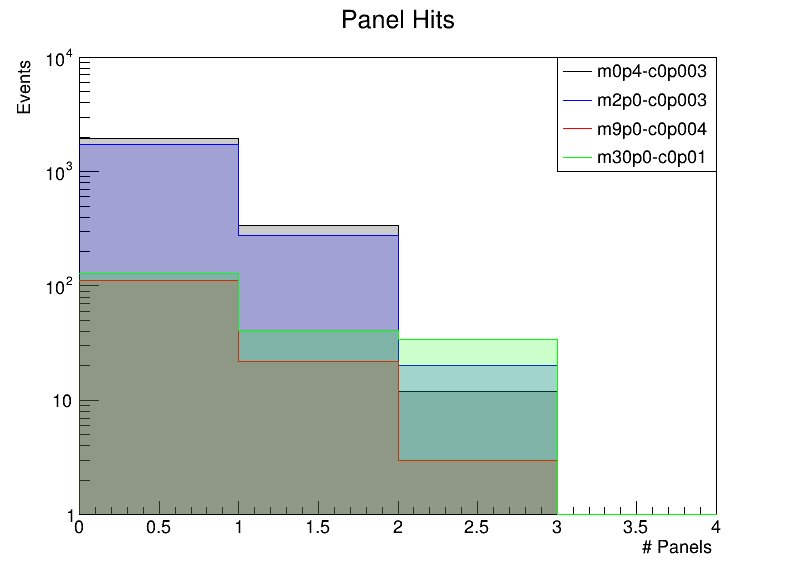

In [39]:
r.gStyle.SetOptStat(0)

l1 = r.TLegend(0.7, 0.7, 0.9, 0.9)

for i, h in enumerate(panelHits):

    if i > 3: continue
    if i == 0:
        h.SetTitle("Panel Hits")
        h.Draw("hist")
        h.SetFillColorAlpha(colors[0], 0.2)
        h.SetLineColor(colors[0])
        h.GetYaxis().SetRangeUser(1, 1e4)
        h.GetXaxis().SetRangeUser(0, 4)

    else:
        h.Draw("same hist")
        h.SetLineColor(colors[i])
        h.SetFillColorAlpha(colors[i], 0.2)

    l1.AddEntry(h, names[i], 'l')

l1.Draw()

c1.Draw()
c1.SetLogy()

In [ ]:
# plot signal cutflows together

c1 = r.TCanvas("c1", "c1", 800, 600)

dataDir = '/eos/user/m/micarrig/milliqan/signalCutFlows/fourLayerCutFlow/'
f_c0p001_m1p0 = r.TFile.Open('/'.join([dataDir, 'bgCutFlow_c0p001_m1p0.root']), 'READ')
f_c0p005_m0p1 = r.TFile.Open('/'.join([dataDir, 'bgCutFlow_c0p005_m0p1.root']), 'READ')
f_c0p01_m9p0 = r.TFile.Open('/'.join([dataDir, 'bgCutFlow_c0p01_m9p0.root']), 'READ')
f_c0p1_m30p0 = r.TFile.Open('/'.join([dataDir, 'bgCutFlow_c0p1_m30p0.root']), 'READ')

h_c0p001_m1p0 = f_c0p001_m1p0.Get('eventCutFlow')
h_c0p005_m0p1 = f_c0p005_m0p1.Get('eventCutFlow')
h_c0p01_m9p0 = f_c0p01_m9p0.Get('eventCutFlow')
h_c0p1_m30p0 = f_c0p1_m30p0.Get('eventCutFlow')

h_c0p001_m1p0 = f_c0p001_m1p0.Get('pulseCutFlow')
h_c0p005_m0p1 = f_c0p005_m0p1.Get('pulseCutFlow')
h_c0p01_m9p0 = f_c0p01_m9p0.Get('pulseCutFlow')
h_c0p1_m30p0 = f_c0p1_m30p0.Get('pulseCutFlow')

In [ ]:
/abyss/users/mcarrigan/milliqan/backgroundCutFlow_signalSim_SR2_allowPanel20_requireFrontBack/

In [ ]:
r.gStyle.SetOptStat(0)

h_c0p001_m1p0.SetTitle("Signal MC Pulse Cuflow")
h_c0p001_m1p0.GetYaxis().SetTitle("Pulses")
h_c0p001_m1p0.GetYaxis().SetRangeUser(1e-1, 4e4)
h_c0p001_m1p0.Draw("hist")
h_c0p001_m1p0.SetFillColorAlpha(r.kBlue, 0.1)

h_c0p005_m0p1.SetLineColor(r.kRed)
h_c0p005_m0p1.SetFillColorAlpha(r.kRed, 0.1)
h_c0p005_m0p1.Draw("same hist")

h_c0p01_m9p0.SetLineColor(r.kBlack)
h_c0p01_m9p0.SetFillColorAlpha(r.kBlack, 0.1)
h_c0p01_m9p0.Draw("same hist")

h_c0p1_m30p0.SetLineColor(r.kGreen)
h_c0p1_m30p0.SetFillColorAlpha(r.kGreen, 0.1)
h_c0p1_m30p0.Draw("same hist")

l1 = r.TLegend(0.7, 0.7, 0.9, 0.9)
l1.AddEntry(h_c0p001_m1p0, '1 GeV, 0.001 q/e', 'l')
l1.AddEntry(h_c0p005_m0p1, '0.1 GeV, 0.005 q/e', 'l')
l1.AddEntry(h_c0p01_m9p0, '9 GeV, 0.01 q/e', 'l')
l1.AddEntry(h_c0p1_m30p0, '30 GeV, 0.1 q/e', 'l')
l1.Draw()

c1.Draw()
c1.SetLogy()

In [ ]:
myfile1 = r.TFile.Open('/eos/experiment/milliqan/sim/bar/signal/MilliQan_sim_c0p005_m0p1.root')
myfile2 = r.TFile.Open('/eos/experiment/milliqan/sim/bar/signal/MilliQan_sim_c0p1_m30p0.root')

mytree1 = myfile1.Get('t')
mytree2 = myfile2.Get('t')

print(mytree.GetEntries())
#mytree.Draw("ipulse:height", "!pickupFlagTight && timeFit_module_calibrated < 1400 && timeFit_module_calibrated > 1100", "colz")
mytree1.Draw("sidebandRMS>>h1()", "Length$(height) >= 4")
mytree2.Draw("sidebandRMS>>h2()", "Length$(height) >= 4", "same")

h1 = r.gPad.GetPrimitive("h1")
h2 = r.gPad.GetPrimitive("h2")

h1.Scale(1/mytree1.GetEntries())
h2.Scale(1/mytree2.GetEntries())

h1.SetTitle("Max Sideband RMS in Events with 4 Pulses")
h1.GetXaxis().SetTitle("Sideband RMS")
h1.GetYaxis().SetTitle("Events")
h1.Draw('hist')
h2.SetLineColor(r.kRed)
h2.Draw("same hist")

l1 = r.TLegend(0.6, 0.6, 0.8, 0.8)
l1.AddEntry(h1, "q=0.005, m=0.1 GeV", "l")
l1.AddEntry(h2, "q=0.1, m=30.0 GeV", "l")
l1.Draw()
c1.Draw()

In [ ]:
myfile1 = r.TFile.Open('/eos/experiment/milliqan/sim/bar/signal/MilliQan_sim_c0p005_m0p1.root')
myfile2 = r.TFile.Open('/eos/experiment/milliqan/sim/bar/signal/MilliQan_sim_c0p1_m30p0.root')

mytree1 = myfile1.Get('t')
mytree2 = myfile2.Get('t')

print(mytree.GetEntries())
#mytree.Draw("ipulse:height", "!pickupFlagTight && timeFit_module_calibrated < 1400 && timeFit_module_calibrated > 1100", "colz")
mytree1.Draw("Max$(npulses)>>h1(30, 0, 30)", "")
mytree2.Draw("Max$(npulses)>>h2(30, 0, 30)", "", "same")

h1 = r.gPad.GetPrimitive("h1")
h2 = r.gPad.GetPrimitive("h2")

h1.Scale(1/mytree1.GetEntries())
h2.Scale(1/mytree2.GetEntries())

h1.SetTitle('Number of Pulses Per Event')
h1.GetXaxis().SetTitle('Pulses')
h1.GetYaxis().SetTitle('Events Normalized')
h1.Draw("hist")
h2.Draw("same hist")
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.6, 0.6, 0.8, 0.8)
l1.AddEntry(h1, "q=0.005, m=0.1 GeV", "l")
l1.AddEntry(h2, "q=0.1, m=30.0 GeV", "l")
l1.Draw()
c1.Draw()

In [ ]:
totalEvents = 0
fullEvents = 0
passingEvents = 0
for ievent, evt in enumerate(mytree):
    if ievent %5000 == 0: print("Working on event", ievent)
    totalEvents += 1
    if len(evt.layer) >0: fullEvents+=1
    this_layer = np.array(evt.layer)
    this_type = np.array(evt.type)
    this_layer = this_layer[this_type == 0]
    if len(np.unique(this_layer)) > 3: passingEvents+=1
    #if ievent > 500: break
    #print(type(evt.layer), len(evt.layer), evt.layer)

print("Total Events {}, full events {}, passing events {}".format(totalEvents, fullEvents, passingEvents))

In [ ]:
#compare data to simulation cut flows
signalDir = '/eos/user/m/micarrig/milliqan/signalCutFlows/'
f_sim = r.TFile.Open('/'.join([signalDir, 'bgCutFlow_c0p005_m0p1.root']), 'READ')
h_sim = f_sim.Get('eventCutFlow')

f_data = r.TFile.Open('bgCutFlow_Full.root', 'READ')
h_data = f_data.Get('eventCutFlow')

n_data = h_data.GetBinContent(8)
n_sim = h_sim.GetBinContent(8)

h_data.Scale(n_sim/n_data)



In [ ]:
h_sim.SetTitle("Sim vs Data Cut Flow")
h_sim.GetYaxis().SetTitle("Events")
h_sim.Draw("hist")
h_sim.SetLineColor(r.kRed)
h_sim.SetFillColorAlpha(r.kRed, 0.1)
h_sim.GetYaxis().SetRangeUser(0.1, 5e4)
h_data.Draw("hist same")
h_data.SetFillColorAlpha(r.kBlue, 0.1)

l1 = r.TLegend(0.7, 0.7, 0.9, 0.9)
l1.AddEntry(h_sim, 'Sim 0.1GeV 0.005 q/e', 'l')
l1.AddEntry(h_data, 'Data', 'l')
l1.Draw()


c1.Draw()

In [ ]:
fin = r.TFile.Open('bgCutFlow_LooseNPE7.root', 'READ')
c1 = r.TCanvas("c1", "c1", 800, 600)
h_ABCD = fin.Get('h_ABCD')
r.gStyle.SetOptStat(0)
h_ABCD.Draw()
c1.Draw()
print(h_ABCD.GetEntries())

h_timeDiff = fin.Get('h_timeDiff')
h_timeDiffPlot = fin.Get('h_timeDiffPlot')

In [ ]:
h_ABCD.Draw("colz")
c1.Draw()

yval = h_ABCD.GetYaxis().FindFixBin(20)
xval = h_ABCD.GetXaxis().FindFixBin(1)

x_low = 0
x_high = h_ABCD.GetNbinsX()

y_low = 0
y_high = h_ABCD.GetNbinsY()
#y_high = h_ABCD.GetYaxis().FindFixBin(100)

lx = r.TLine(x_low, h_ABCD.GetYaxis().GetBinLowEdge(yval+1), h_ABCD.GetXaxis().GetBinLowEdge(x_high+1), h_ABCD.GetYaxis().GetBinLowEdge(yval))
ly = r.TLine(h_ABCD.GetXaxis().GetBinLowEdge(xval), y_low, h_ABCD.GetXaxis().GetBinLowEdge(xval), h_ABCD.GetYaxis().GetBinLowEdge(y_high+1))
lx.SetLineColor(r.kRed)
ly.SetLineColor(r.kRed)
lx.SetLineStyle(7)
ly.SetLineStyle(7)

lx.Draw("same")
ly.Draw("same")

A = h_ABCD.Integral(xval, x_high+1, y_low, yval-1)
B = h_ABCD.Integral(x_low, xval-1, y_low, yval-1)
C = h_ABCD.Integral(x_low, xval-1, yval, y_high+1)
D = h_ABCD.Integral(xval, x_high+1, yval, y_high+1)

err_A = np.sqrt(A)
err_B = np.sqrt(B)
err_C = np.sqrt(C)
err_D = np.sqrt(D)

t_a = r.TLatex()
t_b = r.TLatex()
t_c = r.TLatex()
t_d = r.TLatex()
t_a.SetTextColor(r.kRed)
t_b.SetTextColor(r.kRed)
t_c.SetTextColor(r.kRed)
t_d.SetTextColor(r.kRed)
t_a.DrawLatex(1.4, 2, f"A={A}")
t_b.DrawLatex(0.2, 2, f"B={B}")
t_c.DrawLatex(0.2, 60, f"C={C}")
t_d.DrawLatex(1.4, 60, f"D={D}")

if B == 0: B=1
if C == 0: C=1
if D == 0: D=1

estErrA = (B*D)/C*np.sqrt(1/B + 1/D + 1/C)
print("Estimated error on A", estErrA, (B*D)/C, np.sqrt(1/B + 1/D + 1/C))
estErrA = round(estErrA, 2)
a_est = round(B*D/C, 2)

#output = 'A = #frac{BD}{C} = #frac{' + str(B) + '#times' + str(D) + '}{'+ str(C) + '} = ' + str(a_est) + '#pm ' + str(estErrA)
output = 'A = #frac{BD}{C} = #frac{' + str(B) + '#times' + str(D) + '}{'+ str(C) + '} = ' + str(a_est) + '#pm ' + str(round(np.sqrt(a_est), 2)) + '#pm ' + str(estErrA)

t_results = r.TLatex()
t_results.SetTextSize(0.03)
t_results.SetTextColor(r.kRed)
t_results.DrawLatex(1., 10, output)


c1.SetLogy(1)

nBinsX = h_ABCD.GetNbinsX()
nBinsY = h_ABCD.GetNbinsY()



In [ ]:
c2 = r.TCanvas("c2", "c2", 1200, 600)
c2.Divide(2, 1)
c2.cd(1)
h_ABCD.GetXaxis().SetRangeUser(1, 2)
h_ABCD.GetYaxis().SetRangeUser(0, 40)
h_ABCD.Draw("colz text")
#h_timeDiff.Draw()
#h_timeDiff.GetXaxis().SetRangeUser(0, 40)
c2.cd(2)
h_timeDiff.Draw()
h_timeDiff.GetXaxis().SetRangeUser(0, 40)
c2.Draw()


In [ ]:
#plot the max-min times for straight and non-straight paths

h_straight = r.TH1F('h_straight', 'Max-Min Time Straight Paths', 300, 0, 300)
h_notStraight = r.TH1F('h_notStraight', 'Max-Min Time Non-Straight Paths', 300, 0, 300)

for ybin in range(h_ABCD.GetNbinsY()):
    s = h_ABCD.GetBinContent(2, ybin+1)
    ns = h_ABCD.GetBinContent(1, ybin+1)
    h_straight.SetBinContent(ybin+1, s)
    h_notStraight.SetBinContent(ybin+1, ns)

s_count = h_straight.Integral()
ns_count = h_notStraight.Integral()
print(s_count, ns_count)
h_notStraight.Scale(s_count/ns_count)

h_notStraight.SetTitle('Max-Min Time;dT (ns); Events Scaled')
h_notStraight.Draw('hist')
h_notStraight.SetLineColor(r.kRed)
h_straight.Draw("same")


l1 = r.TLegend(0.6, 0.7, 0.8, 0.9)
l1.AddEntry(h_straight, 'Straight Paths', 'l')
l1.AddEntry(h_notStraight, 'Non-Straight Paths', 'l')
l1.Draw()

c1.Draw()

In [ ]:
def calculateABCD(h_ABCD, maxTime=20):
    
    yval = h_ABCD.GetYaxis().FindFixBin(maxTime)
    xval = h_ABCD.GetXaxis().FindFixBin(1)
    
    x_low = 0
    x_high = h_ABCD.GetNbinsX()
    
    y_low = 0
    y_high = h_ABCD.GetNbinsY()
    
    A = h_ABCD.Integral(xval, x_high+1, y_low, yval-1)
    B = h_ABCD.Integral(x_low, xval-1, y_low, yval-1)
    C = h_ABCD.Integral(x_low, xval-1, yval, y_high+1)
    D = h_ABCD.Integral(xval, x_high+1, yval, y_high+1)
    print(f'A {A} B {B} C {C} D {D}') 
    
    err_A = np.sqrt(A)
    err_B = np.sqrt(B)
    err_C = np.sqrt(C)
    err_D = np.sqrt(D)

    if B==0: B=1
    if C==0: C=1
    if D==0: D=1

    estA = round(B*D/C, 2)
    
    estErrA = (B*D)/C*np.sqrt(1/B + 1/D + 1/C)
    estErrA = round(estErrA, 2)

    return A, estA, estErrA

In [ ]:
c3 = r.TCanvas("c3", "c3", 800, 800)
c3.cd()

# Define the upper pad (larger)
upper_pad = r.TPad("upper_pad", "Upper Pad", 0.0, 0.45, 1.0, 1.0)  # xlow, ylow, xup, yup
upper_pad.SetBottomMargin(0.1)  # Reduce bottom margin
upper_pad.Draw()

# Define the lower pad (smaller)
lower_pad = r.TPad("lower_pad", "Lower Pad", 0.0, 0.0, 1.0, 0.4)  # xlow, ylow, xup, yup
lower_pad.SetTopMargin(0.1)    # Reduce top margin
lower_pad.SetBottomMargin(0.3) # Increase bottom margin for labels
lower_pad.Draw()

In [ ]:
max=0
g_ABCDLoose = r.TGraphErrors()
g_ABCDNPE = r.TGraphErrors()
g_ABCD = r.TGraphErrors()

g_ABCD.SetTitle("ABCD Measured vs Estimated;Measured;Estimated")
h_sigma = r.TH1F('h_sigma', '#sigma ABCD;#sigma(Estimate-Measured);', 50, -5, 5)
for i, filename in enumerate(os.listdir()):
    if not filename.endswith('root') or not filename.startswith('bgCutFlow'): continue

    fin = r.TFile.Open(filename)
    h_ABCD = fin.Get('h_ABCD')
    A, estA, estErrA = calculateABCD(h_ABCD)
    if "LooseNPE" in filename:
        g_ABCDNPE.SetPoint(i, A, estA)
        g_ABCDNPE.SetPointError(i, np.sqrt(A), estErrA)
    elif "Loose" in filename:
        g_ABCDLoose.SetPoint(i, A, estA)
        g_ABCDLoose.SetPointError(i, np.sqrt(A), estErrA)
    else:
        g_ABCD.SetPoint(i, A, estA)
        g_ABCD.SetPointError(i, np.sqrt(A), estErrA)
    diff = estErrA - A
    fin.Close()
    if estErrA == 0:
        sigma = 0
    else:
        sigma = diff/estErrA
    sigma = round(sigma, 2)
    h_sigma.Fill(sigma)
    print(f'file {filename}, A: {A}+-{round(np.sqrt(A), 2)}, estA: {estA}+-{estErrA}, sigma: {sigma}')
    if A > max: max = A
    if estA > max: max = estA

In [ ]:
c3.Clear()
upper_pad = r.TPad("upper_pad", "Upper Pad", 0.0, 0.3, 1.0, 1.0)  # xlow, ylow, xup, yup
upper_pad.SetBottomMargin(0.1)  # Reduce bottom margin
upper_pad.Draw()

# Define the lower pad (smaller)
lower_pad = r.TPad("lower_pad", "Lower Pad", 0.0, 0.0, 1.0, 0.3)  # xlow, ylow, xup, yup
lower_pad.SetTopMargin(0.1)    # Reduce top margin
lower_pad.SetBottomMargin(0.15) # Increase bottom margin for labels
lower_pad.Draw()
    
max = math.ceil(max*1.1)
r.gStyle.SetOptStat(0)
upper_pad.cd()
upper_pad.SetLogx(0)
upper_pad.SetLogy(0)
g_ABCD.Draw("AP")
g_ABCD.SetMaximum(max)
g_ABCD.SetMinimum(-1)
g_ABCD.GetXaxis().SetLimits(-1, max)
g_ABCDLoose.SetLineColor(r.kRed)
g_ABCDNPE.SetLineColor(r.kBlue)
g_ABCDLoose.Draw("same P")
g_ABCDNPE.Draw("same P")
l1 = r.TLine(0, 0, max, max)
l1.SetLineColor(r.kGreen)
l1.SetLineStyle(10)
l1.Draw("same")
lower_pad.cd()
h_sigma.Draw()
c3.Draw()


In [ ]:
c3.Draw()

In [ ]:
fin_default = r.TFile.Open('bgCutFlow_Full.root', 'READ')
fin_nbars = r.TFile.Open('bgCutFlow_NM_nBars.root', 'READ')
fin_sideband = r.TFile.Open('bgCutFlow_NM_sidebandRMS.root', 'READ')
fin_nPEMaxMin = r.TFile.Open('bgCutFlow_NM_nPEMaxMin.root', 'READ')
fin_timeMaxMin = r.TFile.Open('bgCutFlow_NM_timeMaxMin.root', 'READ')
fin_frontBackPanel = r.TFile.Open('bgCutFlow_NM_frontBackPanel.root', 'READ')

h_default = fin_default.Get('eventCutFlow')
h_nbars = fin_nbars.Get('eventCutFlow')
h_sideband = fin_sideband.Get('eventCutFlow')
h_nPEMaxMin = fin_nPEMaxMin.Get('eventCutFlow')
h_timeMaxMin = fin_timeMaxMin.Get('eventCutFlow')
h_frontBackPanel = fin_frontBackPanel.Get('eventCutFlow')

In [ ]:
c_default = h_default.GetBinContent(h_default.GetNbinsX())
c_nbars = h_nbars.GetBinContent(h_nbars.GetNbinsX())
c_sideband = h_sideband.GetBinContent(h_sideband.GetNbinsX())
c_nPE = h_nPEMaxMin.GetBinContent(h_nPEMaxMin.GetNbinsX())
c_time = h_timeMaxMin.GetBinContent(h_timeMaxMin.GetNbinsX())
c_panel = h_frontBackPanel.GetBinContent(h_frontBackPanel.GetNbinsX())

print(c_default, c_nbars, c_sideband, c_nPE, c_time, c_panel)

In [ ]:
#before/after cuts
fin = r.TFile.Open('bgCutFlow_Full.root', 'READ')
c1 = r.TCanvas("c1", "c1", 800, 600)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_nBarsBeforeCut')
h1.SetTitle('Number of Bars Before/After nBars Cut')
#h1.SetFillColor(r.kBlue)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_nBarsAfterCut')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.2, 0.6, 0.4, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_sidebandsBefore')
#h1.SetFillColor(r.kBlue)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_sidebandsAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.2, 0.6, 0.4, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()
c1.SetLogy(1)


In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_panelNPEBefore')
#h1.SetFillColor(r.kBlue)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_panelNPEAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.2, 0.6, 0.4, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()

In [ ]:

r.gStyle.SetOptStat(0)
h1 = fin.Get('h_panelHitsBefore')
#h1.SetFillColor(r.kBlue)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_panelHitsAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.8, 0.6, 0.9, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_frontPanelNPEBefore')
h1.SetTitle('nPE of Front Panel Before/After Cut')
#h1.SetFillColor(r.kBlue)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_frontPanelNPEAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.5, 0.6, 0.7, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()
c1.SetLogy()
c1.SetLogx(0)

In [ ]:


r.gStyle.SetOptStat(0)
h1 = fin.Get('h_backPanelNPEBefore')
h1.SetTitle('nPE of Back Panel Before/After Cut')

#h1.SetFillColor(r.kBlue)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_backPanelNPEAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.8, 0.6, 0.9, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()
c1.SetLogy()
c1.SetLogx(0)

In [ ]:
c1.Clear()
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_straightChannelBefore')
#h1.SetFillColor(r.kBlue)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h1.GetYaxis().SetRangeUser(1e-1, 100)
h2 = fin.Get('h_straightChannelAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.8, 0.8, 0.9, 0.9)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()
c1.SetLogy(1)
c1.SetLogx(0)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_maxNPEBefore')
#h1.SetFillColor(r.kBlue)
#h1.GetXaxis().SetRangeUser(0, 25)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_maxNPEAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.8, 0.6, 0.9, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()
c1.SetLogy(1)
c1.SetLogx(0)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_minNPEBefore')
#h1.SetFillColor(r.kBlue)
#h1.GetXaxis().SetRangeUser(0, 25)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_minNPEAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.8, 0.6, 0.9, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()
c1.SetLogy(1)
c1.SetLogx(0)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_maxTimeBefore')
h1.SetTitle('Max Pulse Time Before/After Time Max-Min Cut')
#h1.SetFillColor(r.kBlue)
h1.GetXaxis().SetRangeUser(1000, 1400)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_maxTimeAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.8, 0.6, 0.9, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()
c1.SetLogy(1)
c1.SetLogx(0)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_minTimeBefore')
h1.SetTitle('Min Pulse Time Before/After Time Max-Min Cut')
#h1.SetFillColor(r.kBlue)
h1.GetXaxis().SetRangeUser(1000, 1400)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_minTimeAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.8, 0.6, 0.9, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()
c1.SetLogy(1)
c1.SetLogx(0)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_nPEBefore')
h1.SetTitle('Max/Min NPE Before Cut')

h1.GetXaxis().SetRangeUser(0, 50)
h1.GetZaxis().SetRangeUser(0, 15)

h1.Draw("colz")
c1.Draw()
c1.SetLogx(1)
c1.SetLogy(0)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_nPEAfter')
h1.SetTitle('Max/Min NPE After Cut')

h1.GetXaxis().SetRangeUser(0, 50)
h1.GetZaxis().SetRangeUser(0, 15)

h1.Draw("colz")
c1.Draw()
c1.SetLogx(1)
c1.SetLogy(0)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_timeAfter')
h1.SetTitle('Max-Min Time After Cut')

#h1.GetXaxis().SetRangeUser(0, 50)
#h1.GetZaxis().SetRangeUser(0, 15)

h1.Draw("colz")
c1.Draw()
c1.SetLogx(0)
c1.SetLogy(0)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_timeBefore')
h1.SetTitle('Max-Min Time Before Cut')

#h1.GetXaxis().SetRangeUser(0, 50)
#h1.GetZaxis().SetRangeUser(0, 15)

h1.Draw("colz")
c1.Draw()
c1.SetLogx(0)
c1.SetLogy(0)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_timeDiff')
h1.SetTitle('Max-Min Time After Cut')
h1.Scale(1/4)

#h1.GetXaxis().SetRangeUser(0, 50)
#h1.GetZaxis().SetRangeUser(0, 15)

h1.Draw("hist")
c1.Draw()
c1.SetLogx(0)
c1.SetLogy(0)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_straightChannelBefore')
h1.SetTitle('Channels Before/After Straight Line Cut')
h1.GetYaxis().SetRangeUser(1e-1, 100)
#h1.SetFillColor(r.kBlue)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_straightChannelAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.8, 0.6, 0.9, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()
c1.SetLogy(1)
c1.SetLogx(0)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_straightHeightBefore')
h1.SetTitle('Height Before/After Straight Line Cut')
#h1.SetFillColor(r.kBlue)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_straightHeightAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.1, 0.6, 0.2, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()
c1.SetLogy(1)
c1.SetLogx(1)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_straightNPEBefore')
h1.SetTitle('nPE Before/After Straight Line Cut')
#h1.SetFillColor(r.kBlue)
h1.GetXaxis().SetRangeUser(0, 25)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_straightNPEAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.8, 0.6, 0.9, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()
c1.SetLogy(1)
c1.SetLogx(0)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_straightTimeBefore')
h1.SetTitle('Times Before/After Straight Line Cut')
#h1.SetFillColor(r.kBlue)
h1.GetXaxis().SetRangeUser(1000, 1500)
h1.SetFillColorAlpha(r.kBlue, 0.3)
h2 = fin.Get('h_straightTimeAfter')
#h2.SetFillColor(r.kRed)
h2.SetFillColorAlpha(r.kRed, 0.4)
h2.SetLineColor(r.kRed)

l1 = r.TLegend(0.8, 0.6, 0.9, 0.8)
l1.AddEntry(h1, 'Before', 'l')
l1.AddEntry(h2, 'After', 'l')

h1.Draw()
h2.Draw("same")
l1.Draw()

c1.Draw()
c1.SetLogy(1)
c1.SetLogx(0)

In [ ]:
r.gStyle.SetOptStat(0)
h1 = fin.Get('h_straightNumPaths')
#h1.SetFillColor(r.kBlue)
#h1.GetXaxis().SetRangeUser(0, 25)
h1.SetFillColorAlpha(r.kBlue, 0.3)
#h2 = fin.Get('h_straightNumPaths')
#h2.SetFillColor(r.kRed)
#h2.SetFillColorAlpha(r.kRed, 0.4)
#h2.SetLineColor(r.kRed)

#l1 = r.TLegend(0.8, 0.6, 0.9, 0.8)
#l1.AddEntry(h1, 'Before', 'l')
#l1.AddEntry(h2, 'After', 'l')

h1.Draw()
#h2.Draw("same")
#l1.Draw()

c1.Draw()
c1.SetLogy(1)
c1.SetLogx(0)

# Plot NPE Before/After Straight Line Cut

Investigating reason that nPECut is necessary

In [ ]:
fin = r.TFile.Open('bgCutFlow_Loose.root')
h_before = fin.Get('h_straightNPEBefore')
h_after = fin.Get('h_straightNPEAfter')

c1 = r.TCanvas("c1", "c1", 800, 600)

h_before.SetTitle('NPE Before/After Straight Line Cut;nPE;Pulses')
h_before.Draw()
h_after.SetLineColor(r.kRed)
h_after.Draw("same")

l1 = r.TLegend(0.7, 0.6, 0.9, 0.8)
l1.AddEntry(h_before, 'Before Straight Cut', 'l')
l1.AddEntry(h_after, 'After Straight Cut', 'l')
l1.Draw()
c1.Draw()
c1.SetLogy()